Titanic dataset
===

In [169]:
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [170]:
df = pd.read_csv('https://gist.githubusercontent.com/khoi/9dbc66e4c2ee841c56c1e390d40dc443/raw/d2914c3a7ba9144a5e7f89dc81bdd44d25c3fddc/titanic.csv')

In [171]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [172]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [173]:
df = pd.get_dummies(df, columns=['Sex'])

In [175]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [176]:
df.drop(["Cabin", "PassengerId", "Name", "Ticket", "Embarked"], axis=1, inplace=True)

In [178]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


### Create train test set

In [179]:
from sklearn.model_selection import train_test_split
X = df.drop("Survived", axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=df["Survived"],random_state=101)

### Create model

In [180]:
from sklearn.linear_model import LogisticRegression

In [181]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
# Evaluate model
from sklearn.metrics import classification_report, confusion_matrix

In [183]:
y_test_pred = lr.predict(X_test)

In [184]:
matrix = confusion_matrix(y_test, y_test_pred)


print(matrix)
tn, fp, fn, tp = matrix.ravel()

[[145  20]
 [ 47  56]]


- Each row represents an actual class
- Each column represents predicted class

In [185]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

$accuracy=\frac{TP+TN}{TP+TN+FP+FN}$

In [116]:
accuracy_score(y_test, y_test_pred)

0.75

$precision=\frac{TP}{TP+FP}$

In [117]:
precision_score(y_test, y_test_pred)

0.7368421052631579

$recall=\frac{TP}{TP+FN}$

In [118]:
recall_score(y_test, y_test_pred)

0.5436893203883495

$F_{1}=\frac{precision \times recall}{precision+recall}$

In [127]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred) 

0.6256983240223464

In [128]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       165
           1       0.74      0.54      0.63       103

    accuracy                           0.75       268
   macro avg       0.75      0.71      0.72       268
weighted avg       0.75      0.75      0.74       268



## Graph

In [147]:
lr.decision_function(X[:1])

array([-2.34379999])

In [153]:
y_train_scores = lr.decision_function(X_train)
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_scores)

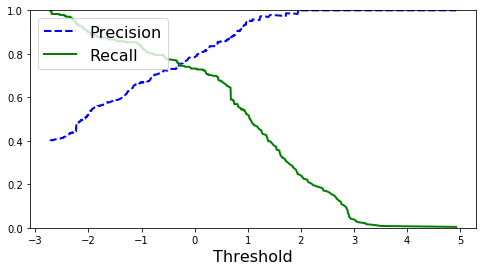

In [154]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

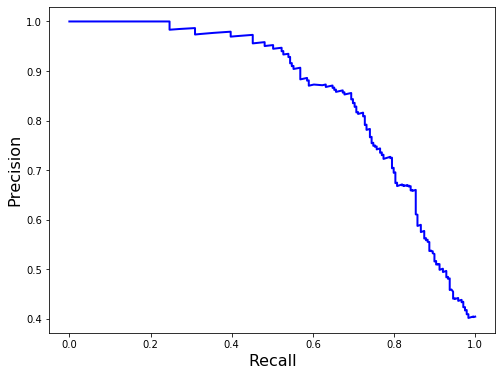

In [155]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [161]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

0.8010030533226022

In [164]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [166]:
precision_score(y_train, y_train_pred_90)

0.9006622516556292

In [167]:
recall_score(y_train, y_train_pred_90)

0.5690376569037657